<a href="https://colab.research.google.com/github/NesrineHamdene/springBoot/blob/main/Projet_AI_Nessrine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction de la temperature :

In [11]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
print(data.head())


Saving seattle-weather.csv to seattle-weather (1).csv
       date  precipitation  temp_max  temp_min  wind  weather
0  1/1/2012            0.0      12.8       5.0   4.7  drizzle
1  1/2/2012           10.9      10.6       2.8   4.5     rain
2  1/3/2012            0.8      11.7       7.2   2.3     rain
3  1/4/2012           20.3      12.2       5.6   4.7     rain
4  1/5/2012            1.3       8.9       2.8   6.1     rain


In [12]:
#Examiner les Colonnes Disponibles
# Liste des colonnes disponibles dans le dataset
print(data.columns)

# Aperçu des types de données et du nombre de valeurs non nulles dans chaque colonne
print(data.info())

# Statistiques descriptives sur les colonnes numériques
print(data.describe())


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.60000

In [13]:
#compter les types de données dans le datase
print(data.dtypes.value_counts())


float64    4
object     2
Name: count, dtype: int64


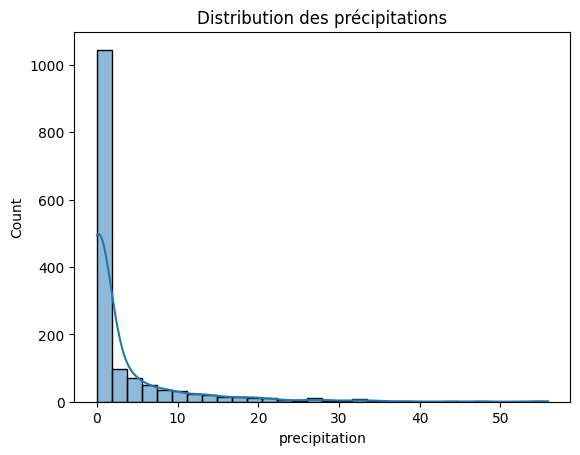

In [14]:
#Visualiser les Données:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['precipitation'], bins=30, kde=True)
plt.title('Distribution des précipitations')
plt.show()
#Distribution des précipitations

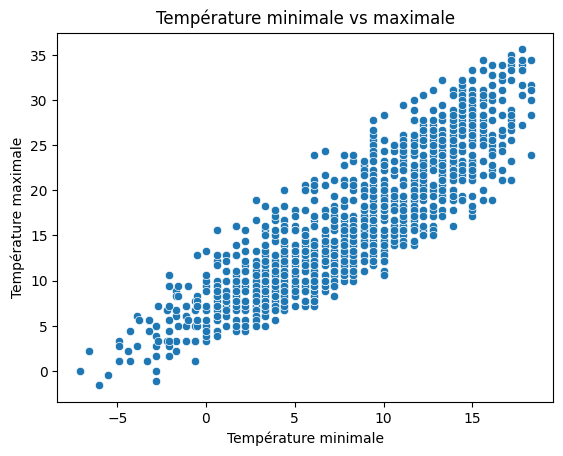

In [15]:
#Température maximale vs minimale:
sns.scatterplot(x=data['temp_min'], y=data['temp_max'])
plt.title('Température minimale vs maximale')
plt.xlabel('Température minimale')
plt.ylabel('Température maximale')
plt.show()


Mean Squared Error (MSE): 53.27483063952056
R² Score: 0.06384202402483796


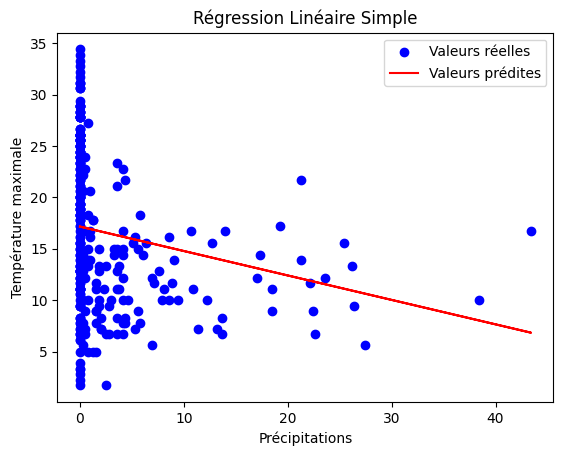

In [25]:
# Choix des modèles:
#1-Régression Linéaire Simple:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data[['precipitation']]  # Exemple avec une caractéristique
y = data['temp_max']  # Exemple avec la température maximale

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calcul du R²
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Valeurs réelles')
plt.plot(X_test, y_pred, color='red', label='Valeurs prédites')
plt.xlabel('Précipitations')
plt.ylabel('Température maximale')
plt.title('Régression Linéaire Simple')
plt.legend()
plt.show()


Mean Squared Error (MSE): 11.10351869094823
R² Score: 0.8048863326426143


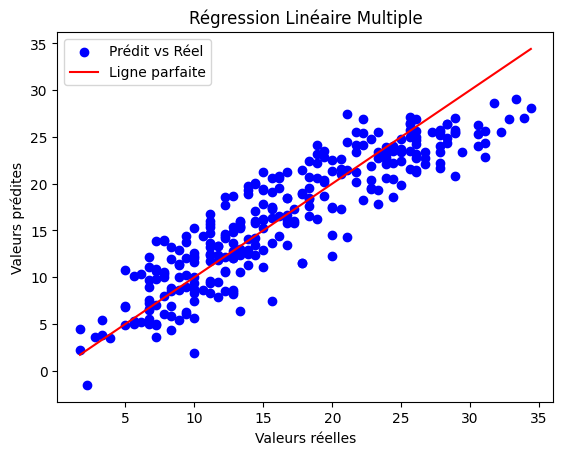

In [26]:
#2-Régression Linéaire Multiple
from sklearn.preprocessing import StandardScaler

# Sélection des caractéristiques (exemple avec plusieurs caractéristiques)
X = data[['precipitation', 'temp_min', 'wind']]  # Exemple avec plusieurs caractéristiques
y = data['temp_max']  # Exemple avec la température maximale

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez et entraînez le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calcul du R²
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Visualisation des résultats (Valeurs réelles vs prédites)
plt.scatter(y_test, y_pred, color='blue', label='Prédit vs Réel')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ligne parfaite')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression Linéaire Multiple')
plt.legend()
plt.show()


Mean Squared Error (MSE): 50.81449015580436
R² Score: 0.10707571129885984


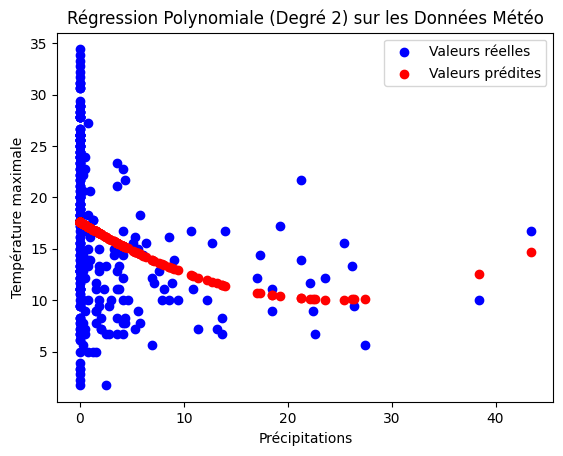

In [28]:
#3-Régression polynomiale:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Exemple avec un dataset météo (remplacez par votre propre jeu de données)
X = data[['precipitation']].values  # Utiliser les précipitations comme caractéristique
y = data['temp_max'].values  # Utiliser la température maximale comme cible

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquez des caractéristiques polynomiales (degré 2 par exemple)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardiser les caractéristiques polynomiales (facultatif, mais recommandé)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Créez et entraînez le modèle de régression polynomiale
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prédictions
y_pred = model.predict(X_test_poly)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test, y_pred, color='red', label='Valeurs prédites')
plt.xlabel('Précipitations')
plt.ylabel('Température maximale')
plt.title('Régression Polynomiale (Degré 2) sur les Données Météo')
plt.legend()
plt.show()


Régression Linéaire : Une régression standard sans régularisation.
Régression Ridge : Ajoute une pénalité L2 pour réduire la complexité du modèle.
Régression Lasso : Ajoute une pénalité L1, ce qui peut mener à une sélection de caractéristiques en réduisant certains coefficients à zéro.
ElasticNet : Combine les pénalités L1 et L2.

Régression Linéaire - R²: 0.06
Régression Linéaire - RMSE: 7.30


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


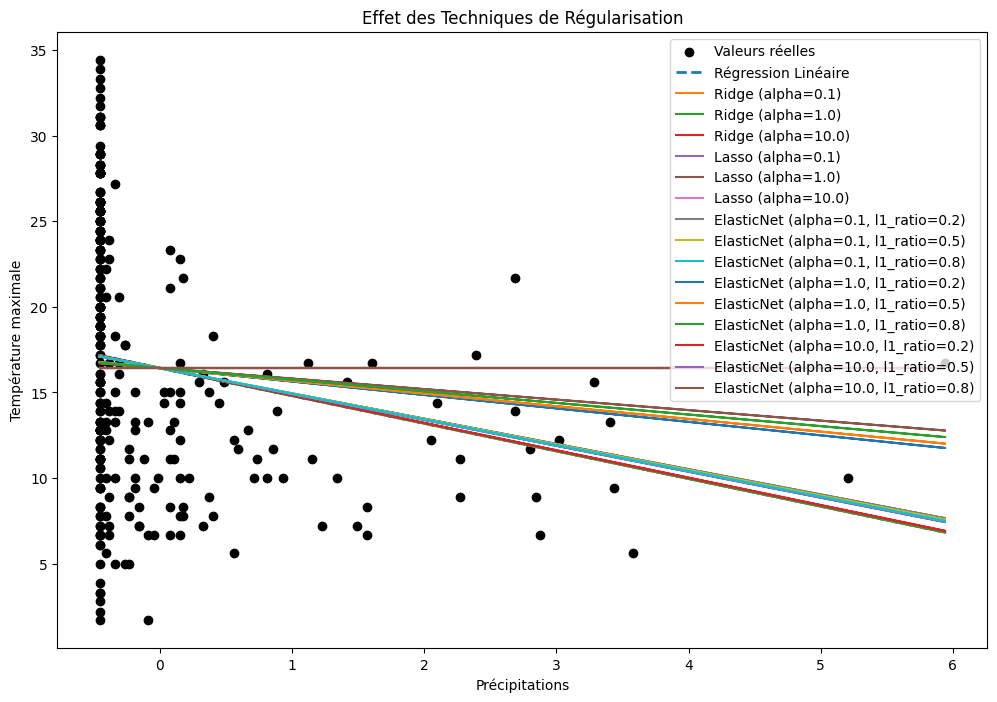

In [32]:
#Régularisation/ Régression Linéaire, Ridge, Lasso, et ElasticNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Sélectionner les caractéristiques (ex : précipitations, température, etc.)
# Exemple : Utilisation des précipitations comme caractéristique et température maximale comme cible
selected_features = ['precipitation']  # Remplacez par les caractéristiques pertinentes de votre dataset
X = data[selected_features]
y = data['temp_max']  # Assurez-vous que 'temp_max' est la colonne pour la température maximale

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print(f"Régression Linéaire - R²: {r2_score(y_test, y_pred_linear):.2f}")
print(f"Régression Linéaire - RMSE: {mean_squared_error(y_test, y_pred_linear, squared=False):.2f}")

# Régression Ridge
ridge_results = {}
alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_results[f'Ridge (alpha={alpha})'] = ridge_model.predict(X_test)

# Régression Lasso
lasso_results = {}
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_results[f'Lasso (alpha={alpha})'] = lasso_model.predict(X_test)

# Régression ElasticNet
elastic_results = {}
l1_ratios = [0.2, 0.5, 0.8]
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_model.fit(X_train, y_train)
        elastic_results[f'ElasticNet (alpha={alpha}, l1_ratio={l1_ratio})'] = elastic_model.predict(X_test)

# Visualisation des résultats
plt.figure(figsize=(12, 8))

# Scatter des valeurs réelles
plt.scatter(X_test, y_test, color='black', label='Valeurs réelles')

# Régression Linéaire
plt.plot(X_test, y_pred_linear, label='Régression Linéaire', linestyle='--', linewidth=2)

# Résultats Ridge
for alpha, preds in ridge_results.items():
    plt.plot(X_test, preds, label=alpha)

# Résultats Lasso
for alpha, preds in lasso_results.items():
    plt.plot(X_test, preds, label=alpha)

# Résultats ElasticNet
for key, preds in elastic_results.items():
    plt.plot(X_test, preds, label=key)

plt.xlabel('Précipitations')
plt.ylabel('Température maximale')
plt.legend()
plt.title('Effet des Techniques de Régularisation')
plt.show()


In [41]:
#Modèle Ridge
from sklearn.linear_model import Ridge

# Créer et entraîner le modèle Ridge
ridge_model = Ridge(alpha=1.0)  # Le paramètre alpha contrôle la force de la régularisation
ridge_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculer les résultats
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Régression Ridge - R²: {r2_ridge:.4f}")
print(f"Régression Ridge - MSE: {mse_ridge:.4f}")


Régression Ridge - R²: 0.0638
Régression Ridge - MSE: 53.2761


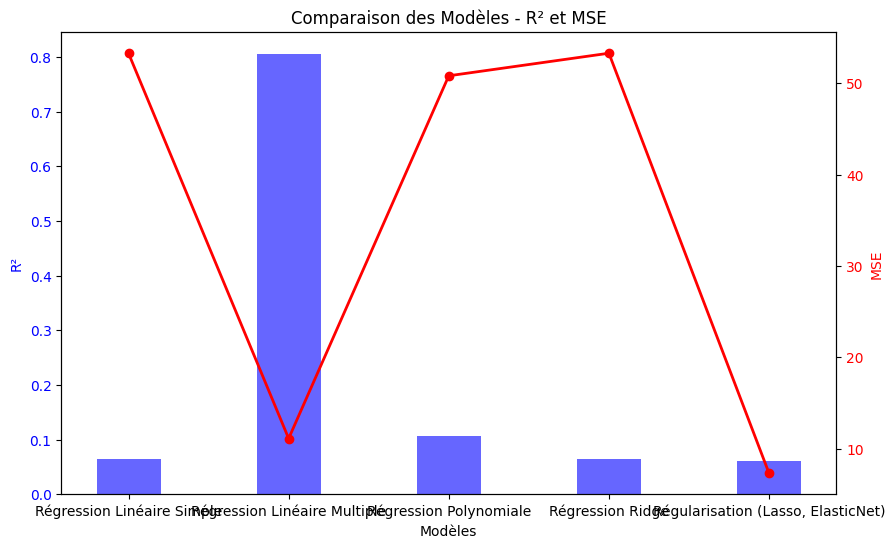

In [47]:
import matplotlib.pyplot as plt

# Résultats des modèles
models = ['Régression Linéaire Simple', 'Régression Linéaire Multiple', 'Régression Polynomiale', 'Régression Ridge', 'Régularisation (Lasso, ElasticNet)']
r2_scores = [0.0638, 0.8049, 0.1071, 0.0638, 0.06]  # R² des modèles (ajout de Ridge)
mse_scores = [53.27, 11.10, 50.81, 53.28, 7.30]   # MSE des modèles (ajout de Ridge)

# Créer un graphique comparant R² et MSE
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graphe pour R²
ax1.bar(models, r2_scores, color='blue', alpha=0.6, label='R²', width=0.4, align='center')
ax1.set_xlabel('Modèles')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Créer un deuxième axe pour MSE
ax2 = ax1.twinx()
ax2.plot(models, mse_scores, color='red', marker='o', label='MSE', linewidth=2)
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajouter un titre
plt.title('Comparaison des Modèles - R² et MSE')

# Afficher le graphique
plt.show()


In [44]:
# Sauvegarder le modèle et le scaler ensemble dans un fichier .pkl

import joblib
joblib.dump((model, scaler), 'seattle_weather_model_and_scaler.pkl')


['seattle_weather_model_and_scaler.pkl']

In [45]:
# Recharger le modèle et le scaler à partir du fichier
model, scaler = joblib.load('seattle_weather_model_and_scaler.pkl')


Conclusion:
Régression Linéaire Multiple: Ce modèle, qui prend en compte plusieurs caractéristiques, a un R² de 0.80 et un MSE de 11.10. Cela montre une amélioration significative, où environ 80 % de la variance des températures peut être expliquée par les variables utilisées. Ce modèle semble être bien adapté aux données.